In [ ]:
!pip install keras_visualizer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import warnings
import re
import string
import random


from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer , TweetTokenizer
from nltk.stem import WordNetLemmatizer ,PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict
from collections import Counter
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import tensorflow as tf

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import numpy as np # linear algebra
import pandas as pd # data processing
pd.options.mode.chained_assignment = None

from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost
import re #Regular expressions
import nltk
from nltk import word_tokenize
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df_train = pd.read_csv('twitter_training.csv', names = ['ID', 'entity', 'output', 'tweet'])
df_val = pd.read_csv('twitter_validation.csv', names = ['ID', 'entity', 'output', 'tweet'])

In [ ]:
print(f'The shape of the dataset is : {df_train.shape}')

The shape of the dataset is : (74682, 4)


In [ ]:
print(f'The columns are :{df_train.columns}')

The columns are :Index(['ID', 'entity', 'output', 'tweet'], dtype='object')


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      74682 non-null  int64 
 1   entity  74682 non-null  object
 2   output  74682 non-null  object
 3   tweet   73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df_train.describe(include='all')

,ID,entity,output,tweet
count,74682.000000,74682,74682,73996
unique,NaN,32,4,69491
top,NaN,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,NaN,2400,22542,172
mean,6432.586165,NaN,NaN,NaN
std,3740.427870,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [ ]:
df_train.drop_duplicates(inplace=True)
df_train.dropna(inplace=True)

In [ ]:
df_train.isna().sum()

ID        0
entity    0
output    0
tweet     0
dtype: int64

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
print(f'Unique Entities\' length in the dataset is : {len(df_train["entity"].unique())}')
print(f'Unique Entities in the dataset are : {df_train["entity"].unique()}')

Unique Entities' length in the dataset is : 32
Unique Entities in the dataset are : ['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']


In [ ]:
entities = df_train.entity.value_counts()
entities.to_frame()

,count
entity,
TomClancysRainbowSix,2328
Verizon,2319
MaddenNFL,2315
CallOfDuty,2314
Microsoft,2304
WorldOfCraft,2300
NBA2K,2299
LeagueOfLegends,2296
TomClancysGhostRecon,2291


<ipython-input-68-6a082139b7ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=entities.values ,y=entities.index , palette='rocket')


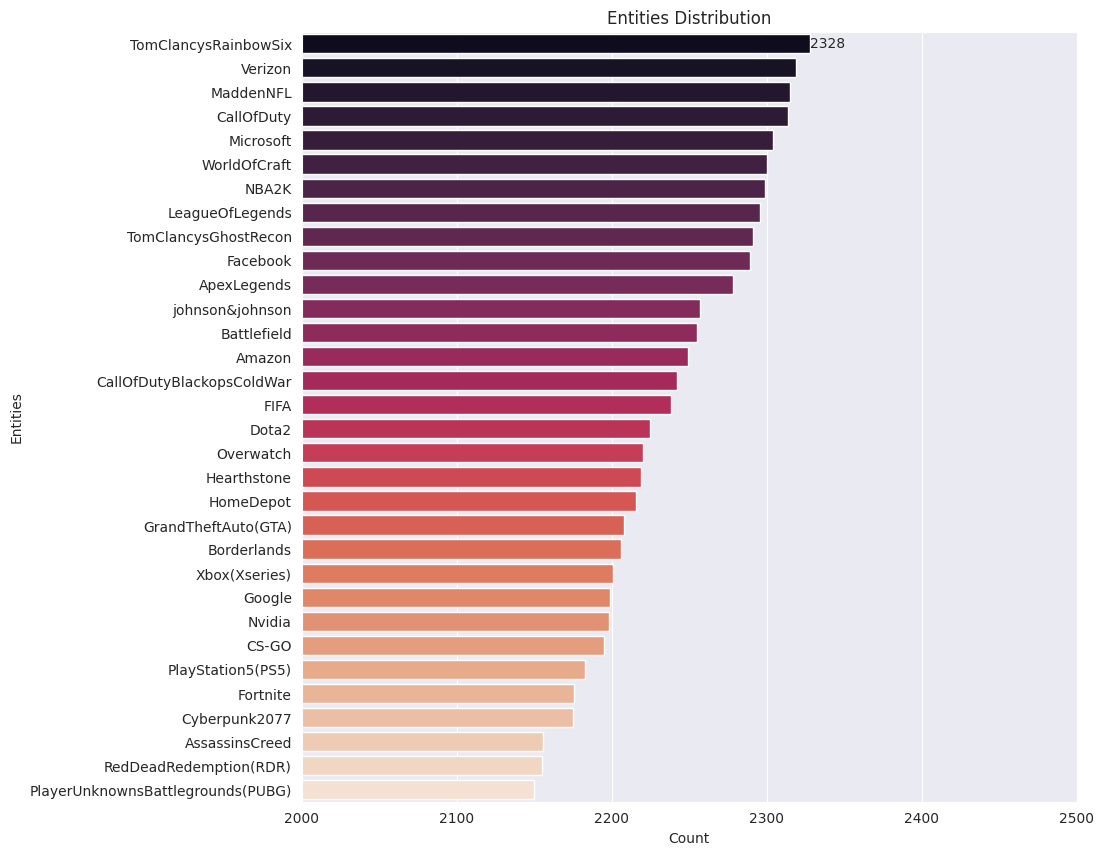

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
bar = sns.barplot(x=entities.values ,y=entities.index , palette='rocket')
bar.bar_label(bar.containers[0])
plt.title('Entities Distribution')
plt.xlabel('Count')
plt.ylabel('Entities')
plt.xlim(2000 , 2500)
plt.show()

In [ ]:
print(f'Length of Outcomes are : {len(df_train["output"].unique())}')
print(f'Outcomes are : {df_train["output"].unique()}')

Length of Outcomes are : 4
Outcomes are : ['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [ ]:
outputs = df_train.output.value_counts()
outputs.to_frame().T

output,Negative,Positive,Neutral,Irrelevant
count,21698,19713,17708,12537


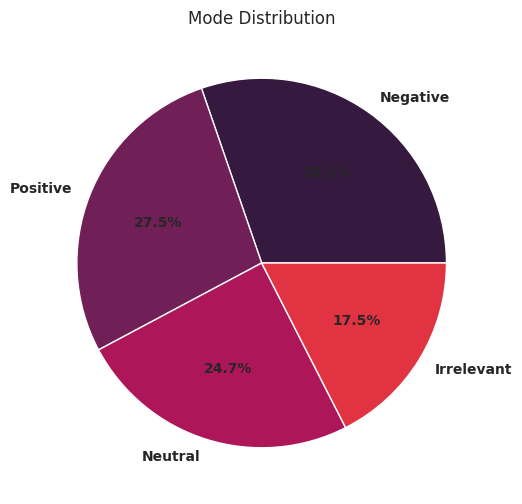

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(x = outputs.values , labels=outputs.keys() ,autopct="%1.1f%%" ,
textprops={"fontsize":10,"fontweight":"black"},colors=sns.color_palette("rocket"))
plt.title('Mode Distribution')
plt.show()

In [ ]:
pd.crosstab(df_train.output , df_train.entity).T.style.background_gradient( subset=['Negative'],cmap='Reds')\
.background_gradient(subset=['Positive'] , cmap='Greens')\
.background_gradient(subset=['Irrelevant'] , cmap='BuGn')

output,Irrelevant,Negative,Neutral,Positive
entity,,,,
Amazon,185,565,1197,302
ApexLegends,185,574,913,606
AssassinsCreed,256,365,153,1382
Battlefield,907,445,342,561
Borderlands,238,415,581,972
CS-GO,620,335,523,717
CallOfDuty,660,861,367,426
CallOfDutyBlackopsColdWar,545,540,340,817
Cyberpunk2077,457,360,456,902


In [ ]:
# Text transformation for training data
df_train["lower"] = df_train.tweet.str.lower()  # lowercase
df_train["lower"] = [str(data) for data in df_train.lower]  # converting all to string
df_train["lower"] = df_train.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))  # regex

# Text transformation for validation data
df_val["lower"] = df_val.tweet.str.lower()  # lowercase
df_val["lower"] = [str(data) for data in df_val.lower]  # converting all to string
df_val["lower"] = df_val.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))  # regex

In [ ]:
df_train.head()

,ID,entity,output,tweet,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


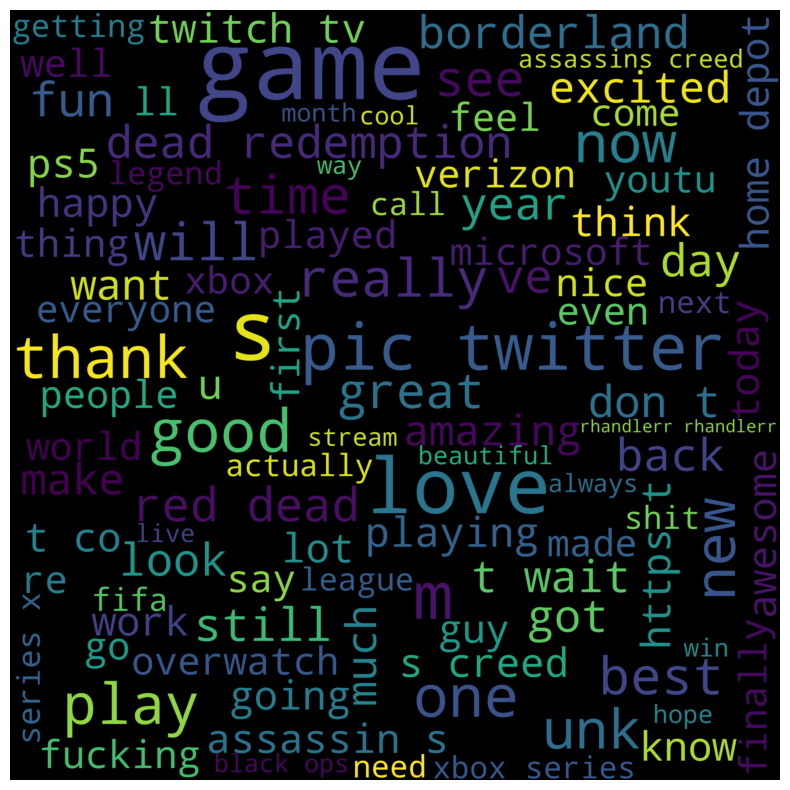

In [ ]:
# Generate word cloud text for positive tweets in training data
word_cloud_text = ''.join(df_train[df_train["output"] == "Positive"]["lower"])

# Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

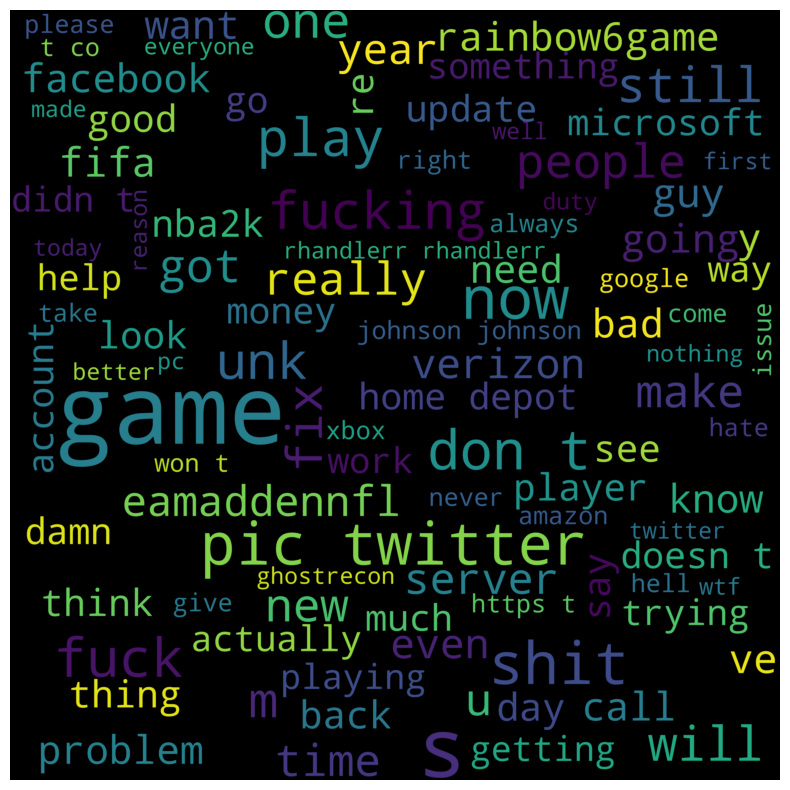

In [ ]:
word_cloud_text = ''.join(df_train[df_train["output"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

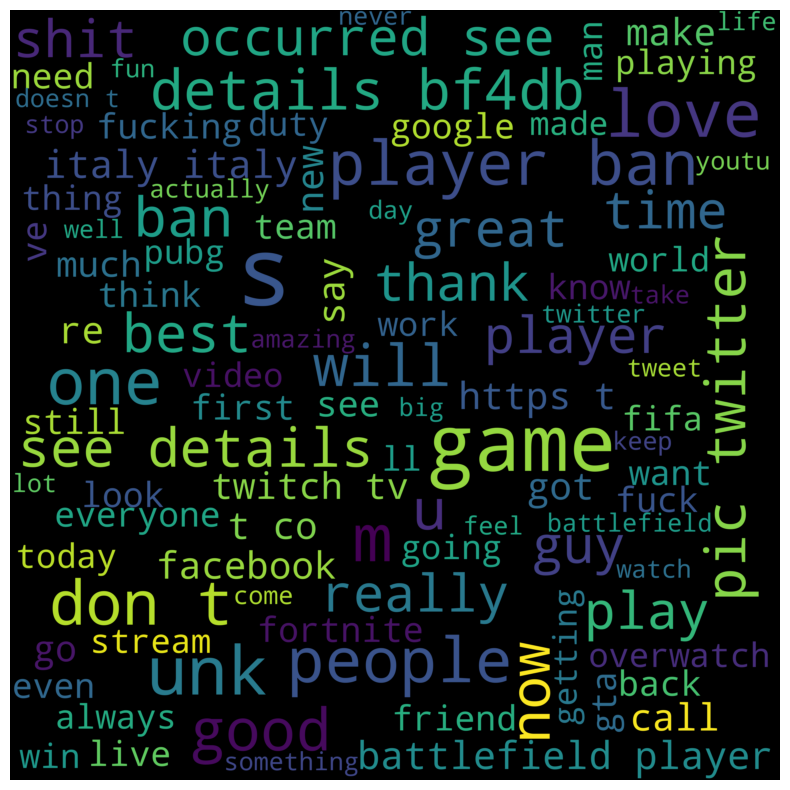

In [ ]:
word_cloud_text = ''.join(df_train[df_train["output"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

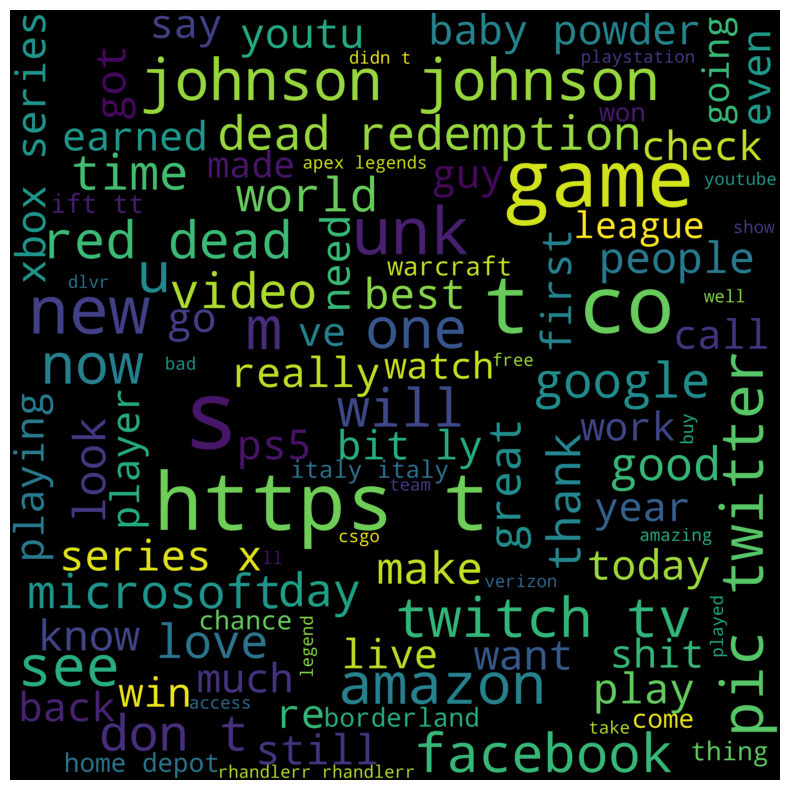

In [ ]:
word_cloud_text = ''.join(df_train[df_train["output"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
plot=df_train.groupby(by=["entity","output"]).count().reset_index()
plot.head()

,entity,output,ID,tweet,lower
0,Amazon,Irrelevant,185,185,185
1,Amazon,Negative,565,565,565
2,Amazon,Neutral,1197,1197,1197
3,Amazon,Positive,302,302,302
4,ApexLegends,Irrelevant,185,185,185


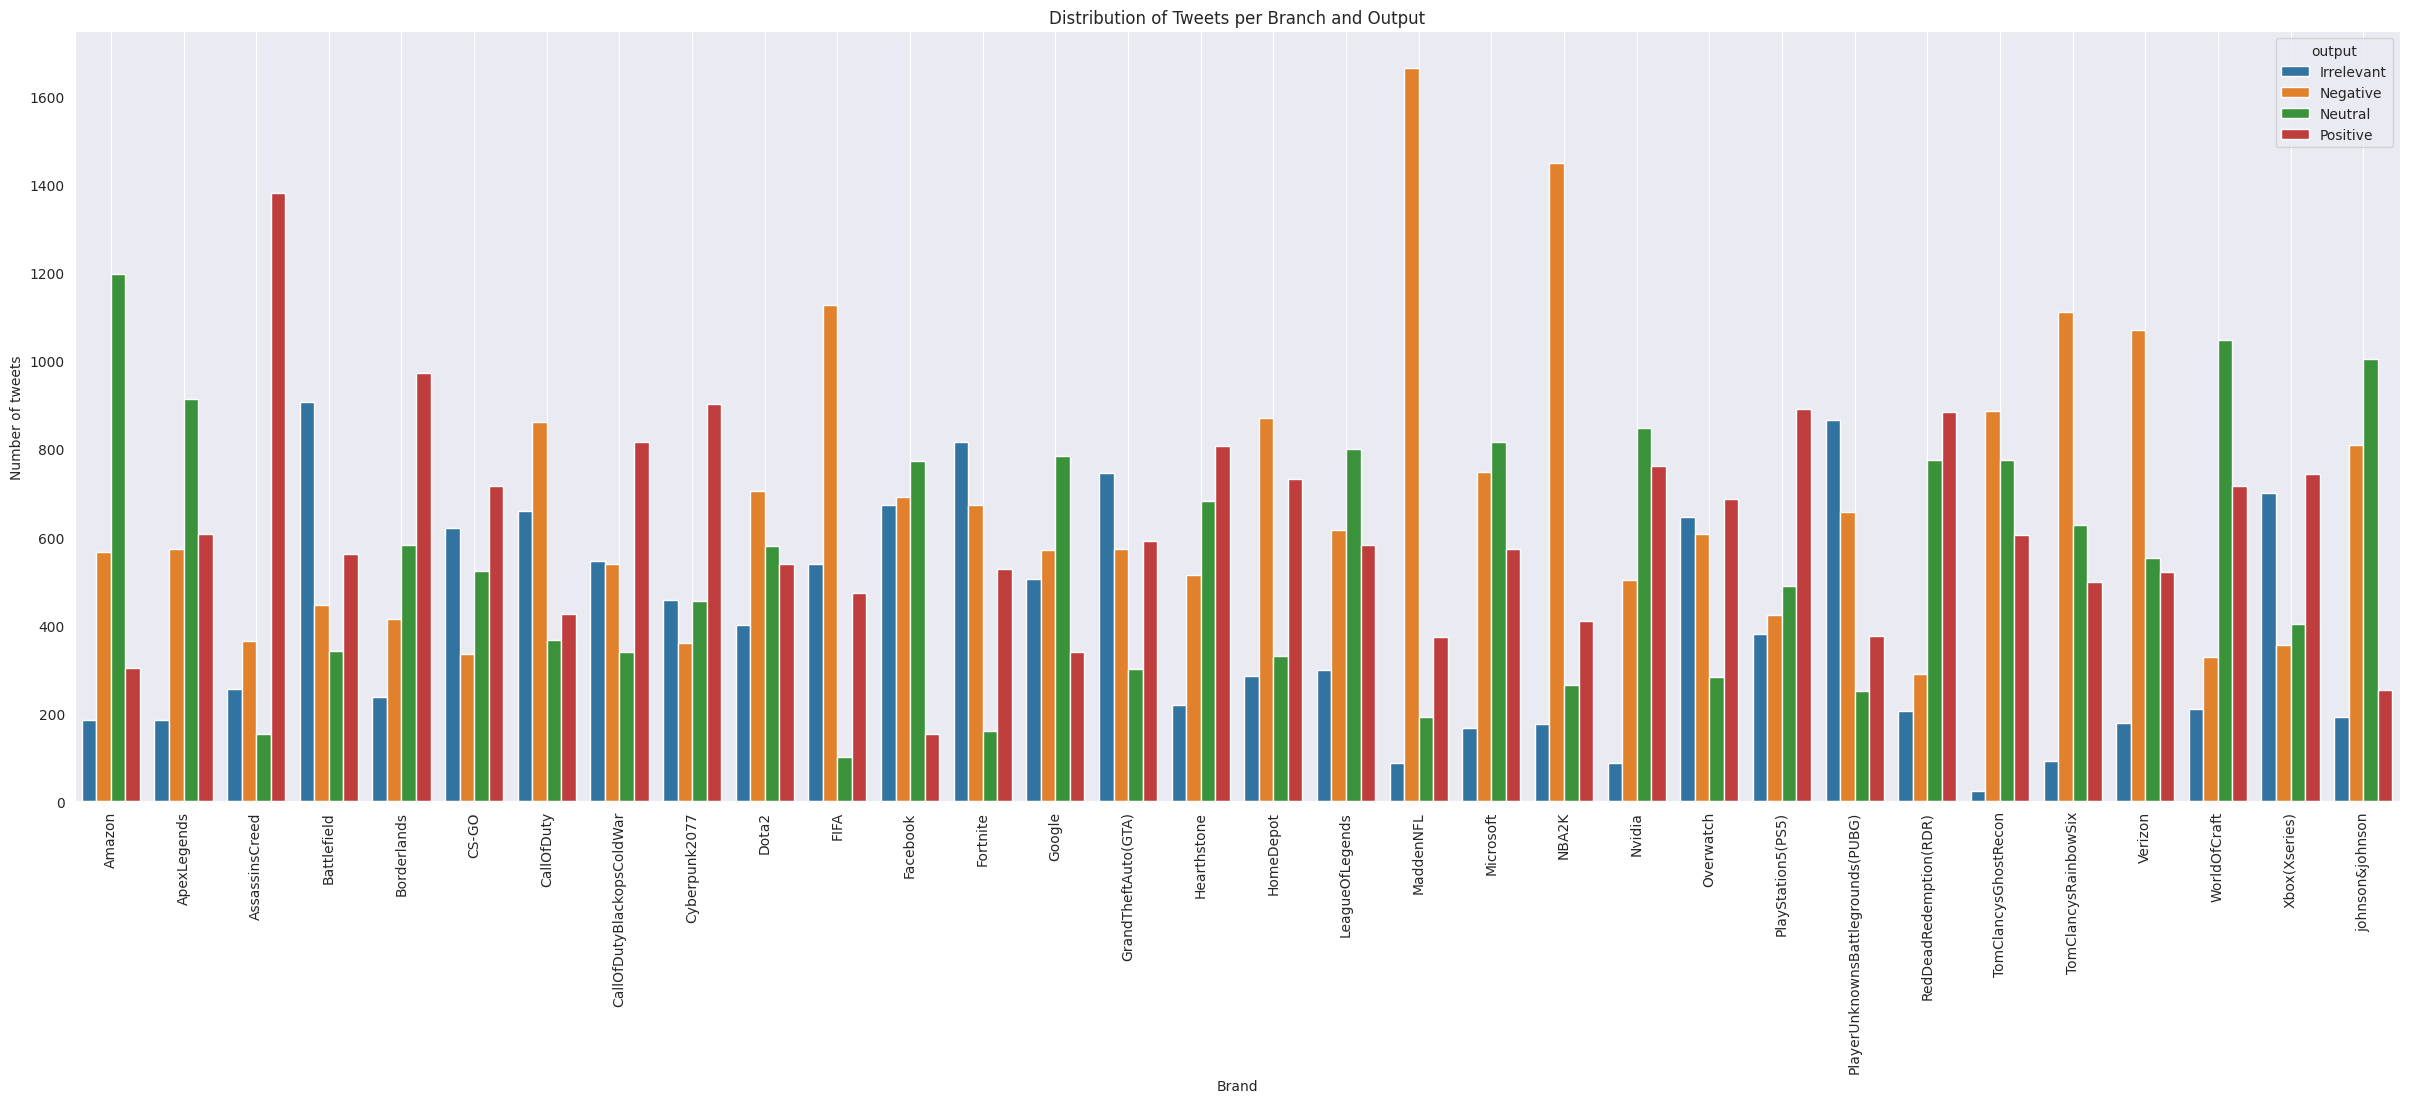

In [ ]:
#Figure of comparison per branch
plt.figure(figsize=(30,10))
sns.barplot(data=plot,x="entity",y="ID",hue="output")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of Tweets per Branch and Output");

In [ ]:
nltk.download('punkt')

tokens_text = [word_tokenize(str(word)) for word in df_train.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Number of tokens:  30435


In [ ]:
print(f'Sample Tokens: {tokens_text[0]}')

Sample Tokens: ['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'all']


In [ ]:
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')

In [ ]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(df_train, test_size=0.2, random_state=0)

In [ ]:
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(df_val.lower)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_train_bow

<57324x1425894 sparse matrix of type '<class 'numpy.int64'>'
	with 4076770 stored elements in Compressed Sparse Row format>

In [ ]:
y_train_bow = reviews_train['output']
y_test_bow = reviews_test['output']

In [ ]:
%%time
model = LogisticRegression(C=0.9, solver="liblinear",max_iter=1500)
# Logistic regression
history = model.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  91.38989673457996
CPU times: user 3min 53s, sys: 1min 47s, total: 5min 40s
Wall time: 4min 47s


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
from imblearn.metrics import specificity_score


In [ ]:
print('Classification Report:')
print(classification_report(y_test_bow, test_pred))

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.97      0.86      0.91      2535
    Negative       0.91      0.94      0.92      4306
     Neutral       0.94      0.90      0.92      3568
    Positive       0.87      0.94      0.90      3923

    accuracy                           0.91     14332
   macro avg       0.92      0.91      0.91     14332
weighted avg       0.92      0.91      0.91     14332



In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test_bow, test_pred))

Confusion Matrix:
[[2182  106   55  192]
 [  21 4043   70  172]
 [  25  138 3197  208]
 [  25  153   69 3676]]


In [ ]:
y_val_bow = df_val['output']
Val_pred = model.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_pred) * 100)

Accuracy:  98.7


In [ ]:
print('Classification Report:')
print(classification_report(y_val_bow, Val_pred))

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.99      0.98      0.99       172
    Negative       0.99      0.99      0.99       266
     Neutral       0.99      0.99      0.99       285
    Positive       0.98      0.98      0.98       277

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_val_bow, Val_pred))

Confusion Matrix:
[[169   1   0   2]
 [  0 264   1   1]
 [  0   0 282   3]
 [  2   1   2 272]]
